# Question 3: How do choices about data such as i) amount of training data and ii) balance of classes in a classification problem affect the performance of a neural network?

## Introduction

### Overview

In this final notebook we will look at how choices about the data affect the Neural Network's (NN) performance. I assume you have read and understood both the Question 1 and Question 2 notebooks before starting this one.

The first part of this will focus on chaning the ratio between the training, validation, and testing sets. In Question 2 I used a 64/16/20 split but here we will see what happens with a much smaller or larger training set. The second part will then focus on adjusting the weighting of the different classes to force the model to pay more or less attention to certain classes.

In order to do this easily, I have created a function stored in functions.py that wraps all the code from Question 2. It takes the following inputs:
- features
    - The feature data
- labels
    - The label data
- test_ratio=0.2
    - The amount of data used for testing
- val_ratio=0.2
    - The amount of data used for validation
- hidden_size=64
    - The side of the hidden layer
- num_epochs=20
    - The number of epochs
- batch_size=32
    - The batch size
- learning_rate=0.001
    - The learning rate
- use_class_weights=False
    - Whether or not to balance the classes so they have an equal affect on the loss

## Imports

In [25]:
import pandas as pd
import numpy as np

## Initialising the Dataset

Let us load the same dataset used in question 2.

In [2]:
# Change the path to where the csv file is stored on your pc
path = "/Users/Ryan/Documents/Ryan's Documents/Uni/Year 4/Comp/Coursework 2/SDSS.csv"
data = pd.read_csv(path)
features = data[['u', 'g', 'r', 'i', 'z']]
labels = data['class']
features

,u,g,r,i,z
0,19.47406,17.04240,15.94699,15.50342,15.22531
1,18.66280,17.21449,16.67637,16.48922,16.39150
2,19.38298,18.19169,17.47428,17.08732,16.80125
3,17.76536,16.60272,16.16116,15.98233,15.90438
4,17.55025,16.26342,16.43869,16.55492,16.61326
...,...,...,...,...,...
9995,18.81777,17.47053,16.91508,16.68305,16.50570
9996,18.27255,17.43849,17.07692,16.71661,16.69897
9997,18.75818,17.77784,17.51872,17.43302,17.42048
9998,18.88287,17.91068,17.53152,17.36284,17.13988


## Loading the train_sdss_model function

In order to call functions from the functions.py file, we need to edit the path as below.

In [7]:
import os, sys
sys.path.append('../')
from functions import train_sdss_model, plot_cm, plot_loss

## Adjusting the Training/Validation/Testing ratios

First we will call train_sdss_model function for different ratios.

In [40]:
# Same as Question 2 (Train/Val/Test = 64/16/20)
default_ratio = train_sdss_model(features, labels, 
                                       test_ratio=0.2, val_ratio=0.2, 
                                       num_epochs=20)

# Medium test ratio (Train/Val/Test = 48/12/40)
medium_ratio = train_sdss_model(features, labels, 
                                       test_ratio=0.4, val_ratio=0.2, 
                                       num_epochs=20)

# Higher test ratio (Train/Val/Test = 32/8/60)
higher_ratio = train_sdss_model(features, labels, 
                                       test_ratio=0.6, val_ratio=0.2, 
                                       num_epochs=20)

# Highest test ratio (Train/Val/Test = 16/4/80)
highest_ratio = train_sdss_model(features, labels, 
                                       test_ratio=0.8, val_ratio=0.2, 
                                       num_epochs=20)

### Classification Report

Now lets compare how accuracte each one is by showing their classification reports.

In [41]:
print("Results with default ratio:")
print(default_ratio['classification_report'])

print("\nResults with medium ratio:")
print(medium_ratio['classification_report'])


Results with default ratio:
              precision    recall  f1-score   support

      GALAXY     0.9736    0.9247    0.9485       996
         QSO     0.9115    0.9211    0.9162       190
        STAR     0.9165    0.9705    0.9427       814

    accuracy                         0.9430      2000
   macro avg     0.9338    0.9388    0.9358      2000
weighted avg     0.9444    0.9430    0.9431      2000


Results with medium ratio:
              precision    recall  f1-score   support

      GALAXY     0.9506    0.9377    0.9441      1991
         QSO     0.9246    0.8995    0.9118       368
        STAR     0.9261    0.9470    0.9364      1641

    accuracy                         0.9380      4000
   macro avg     0.9338    0.9281    0.9308      4000
weighted avg     0.9382    0.9380    0.9380      4000



In [42]:
print("\nResults with higher ratio:")
print(higher_ratio['classification_report'])

print("\nResults with highest ratio:")
print(highest_ratio['classification_report'])


Results with higher ratio:
              precision    recall  f1-score   support

      GALAXY     0.9724    0.9144    0.9425      3003
         QSO     0.9246    0.8776    0.9005       531
        STAR     0.9019    0.9773    0.9381      2466

    accuracy                         0.9370      6000
   macro avg     0.9330    0.9231    0.9270      6000
weighted avg     0.9392    0.9370    0.9370      6000


Results with highest ratio:
              precision    recall  f1-score   support

      GALAXY     0.9651    0.9181    0.9410      3980
         QSO     0.9454    0.8181    0.8771       698
        STAR     0.8989    0.9768    0.9362      3322

    accuracy                         0.9337      8000
   macro avg     0.9365    0.9043    0.9181      8000
weighted avg     0.9359    0.9337    0.9335      8000



As you can see the overall accuracy doesn't really change that much. The default ratio had the best accuracy, however the highest ratio was only a little bit lower. The real probelem between them is that the lower the training set the more underfit the data is. This is more easily seen by the fact that the f1-score recall drops significantly for QSO (the minority class). While these numbers are still relatively high, the big drop shows that the models with less training data are clearly less accurate overall.

### Loss Curves

If we plot the loss curves for each ratio, we can also see that the loss doesn't converge as well, and the shapes are less smooth, for the higher ratios.

Confusion matrix with default ratio:


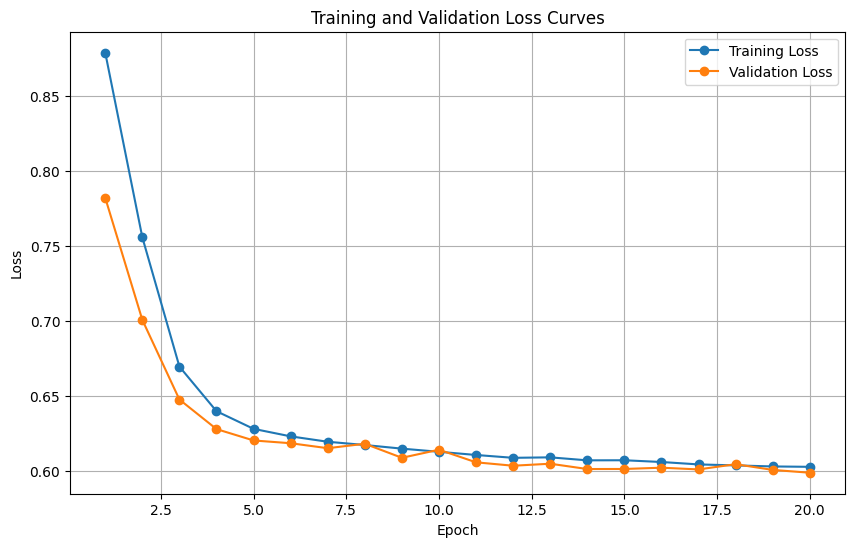


Confusion matrix with medium ratio:


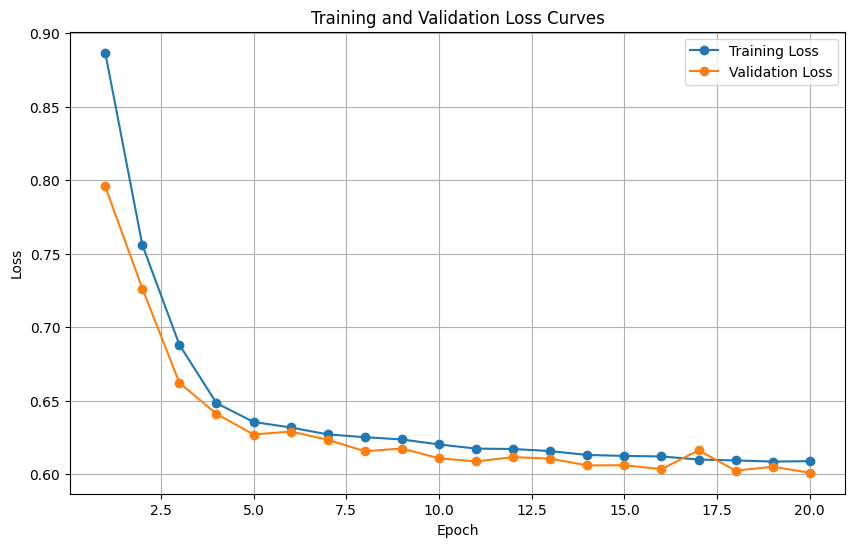


Confusion matrix with higher ratio:


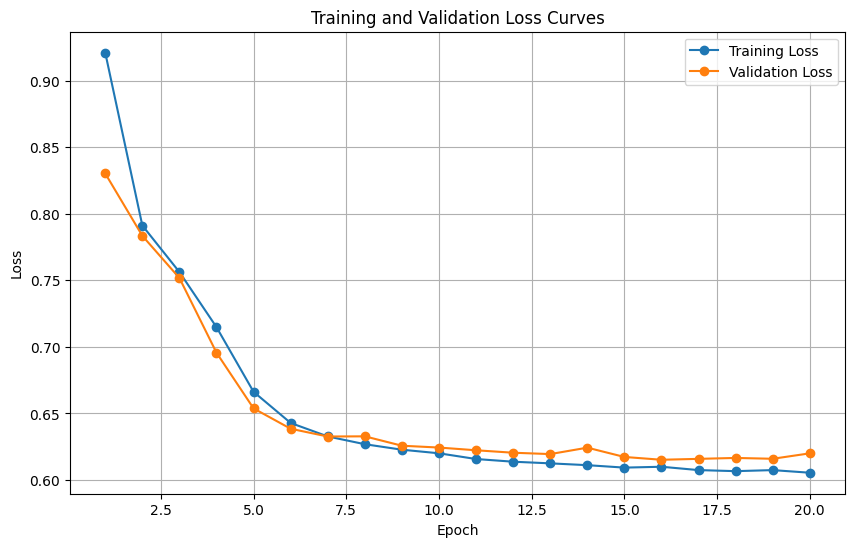


Confusion matrix with highest ratio:


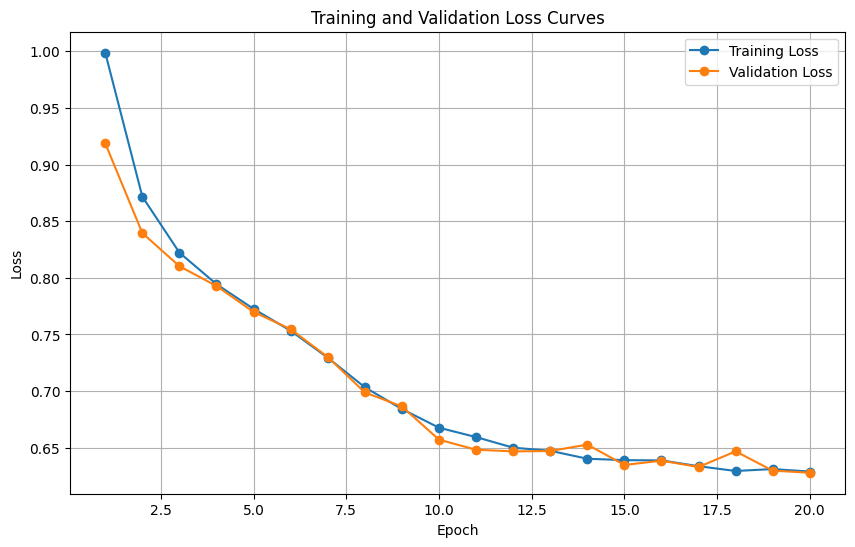

In [19]:
print("Confusion matrix with default ratio:")
plot_loss(default_ratio['train_loss_history'], default_ratio['val_loss_history'],)

print("\nConfusion matrix with medium ratio:")
plot_loss(medium_ratio['train_loss_history'], medium_ratio['val_loss_history'],)

print("\nConfusion matrix with higher ratio:")
plot_loss(higher_ratio['train_loss_history'], higher_ratio['val_loss_history'],)

print("\nConfusion matrix with highest ratio:")
plot_loss(highest_ratio['train_loss_history'], highest_ratio['val_loss_history'],)

### Confusion Matrix

Now we can plot confusion matrices for each ratio. I plot them both normalised and unnormalised. The normalised versions will more clearly show that the higher ratios are worse, but again there isn't a huge difference.

Confusion matrix with default ratio:


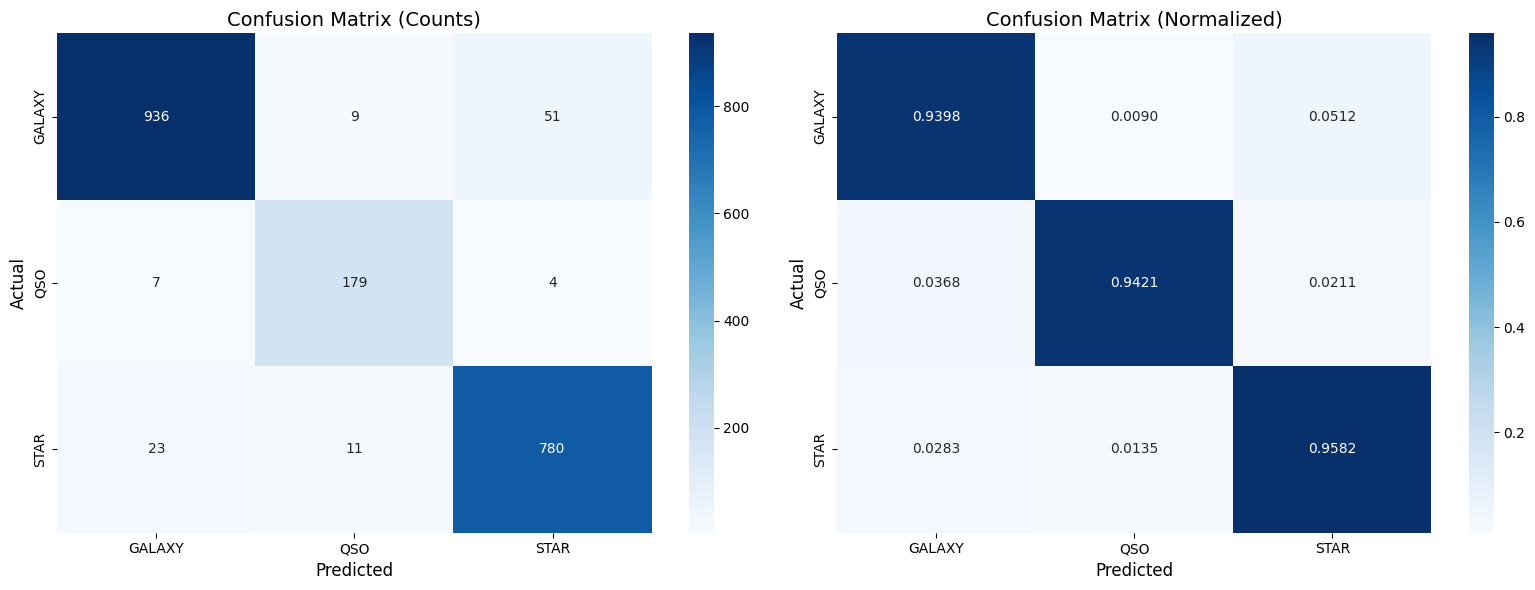


Confusion matrix with medium ratio:


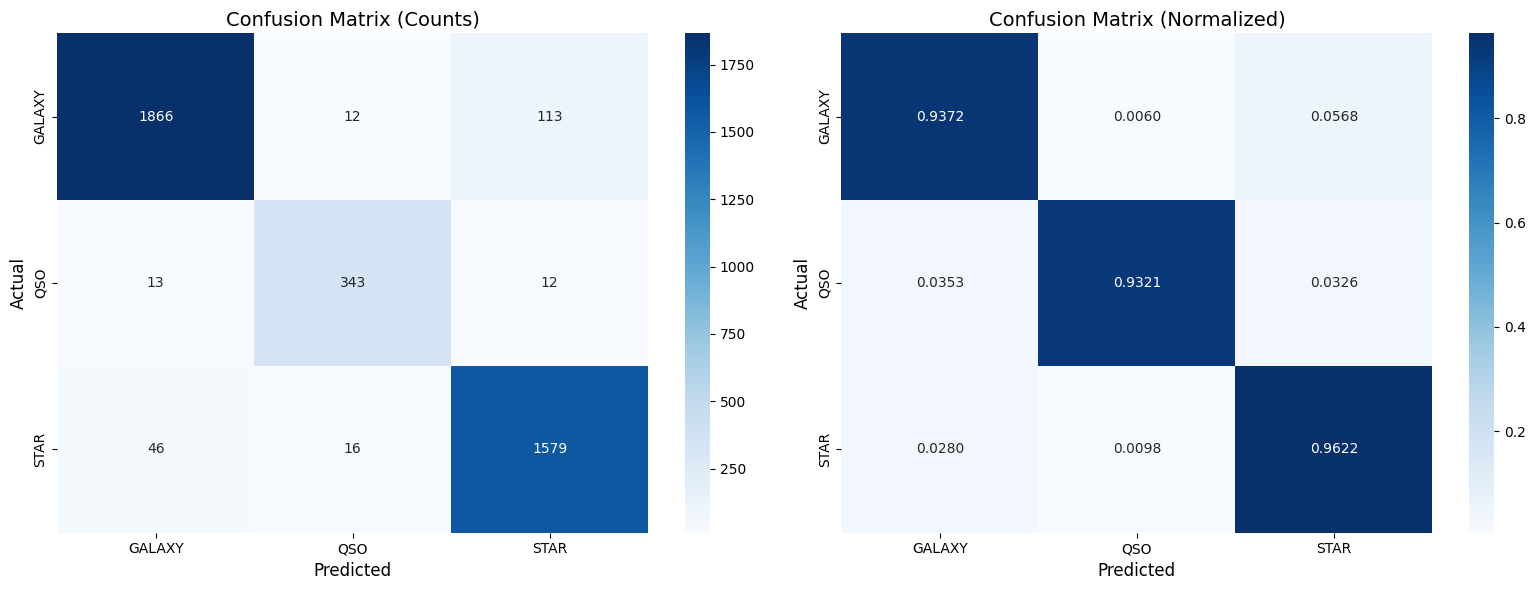


Confusion matrix with higher ratio:


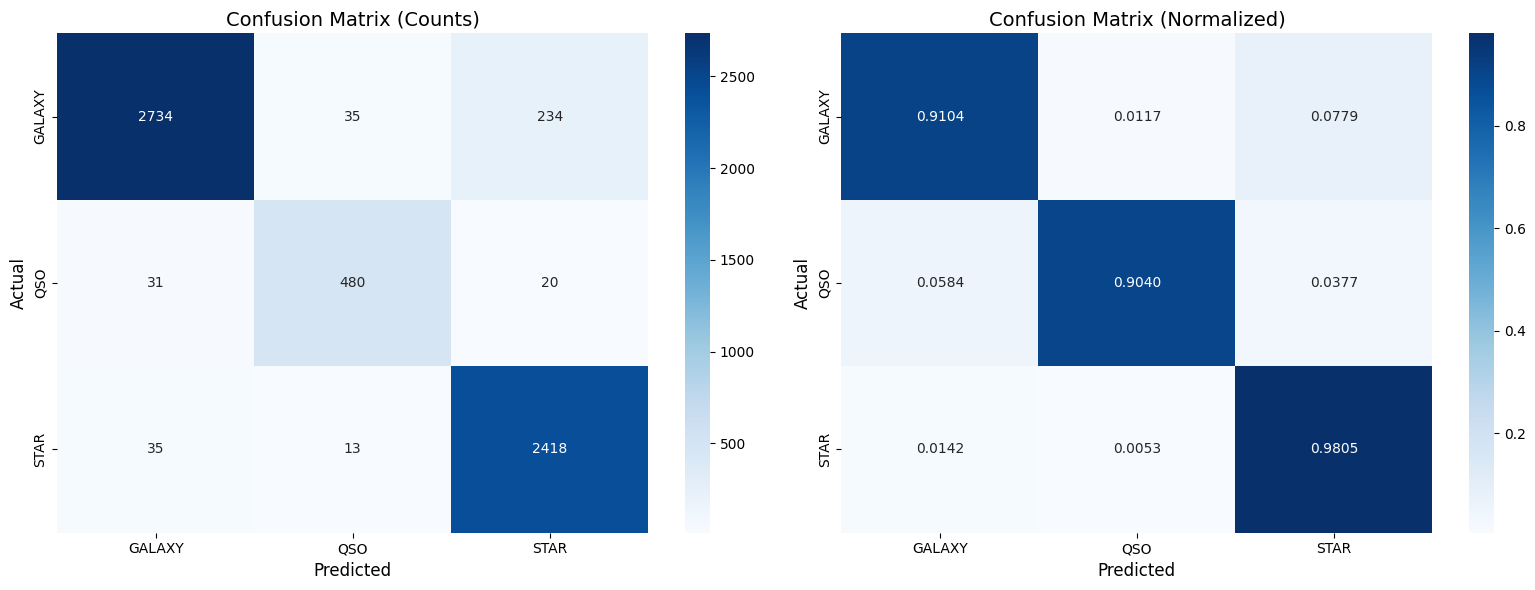


Confusion matrix with highest ratio:


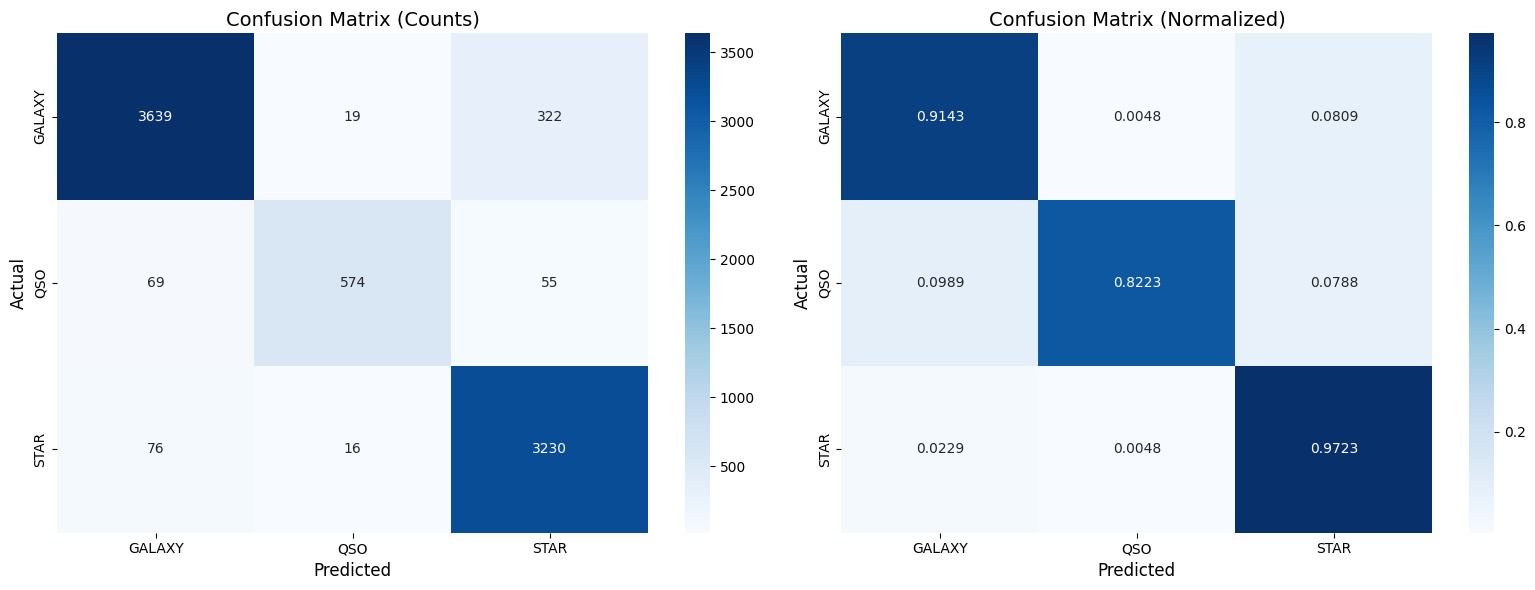

In [29]:
print("Confusion matrix with default ratio:")
plot_cm(default_ratio['confusion_matrix'], default_ratio['confusion_matrix_normalized'], np.unique(labels))

print("\nConfusion matrix with medium ratio:")
plot_cm(medium_ratio['confusion_matrix'], medium_ratio['confusion_matrix_normalized'], np.unique(labels))

print("\nConfusion matrix with higher ratio:")
plot_cm(higher_ratio['confusion_matrix'], higher_ratio['confusion_matrix_normalized'], np.unique(labels))

print("\nConfusion matrix with highest ratio:")
plot_cm(highest_ratio['confusion_matrix'], highest_ratio['confusion_matrix_normalized'], np.unique(labels))

The slightly lighter colour for the QSO predictions shows that for that class at least, there was a noticible drop in true predictions.

### Why are the Different Ratios so Similar?

What is interesting about these results is that it goes against the common sense that training a NN with less data will make it far less accurate. There are a couple reasons why this might be the case:
- FNNs are very simple and are not as prone to overfitting as more complex models for smaller datasets
    - They are also very efficient on smaller datasets as they don't require large amounts of data to reach a reasonable generalisation level
- The SDSS DR14 dataset is very high quality and the features chosen (u, g, r, i, z) hold a lot of information regarding separating out the different classes (Star, Galaxy, QSO)
    - There also isn't a huge class imbalance, with stars and galaxies being similar
    - The QSO class is the minority which is why there is a greater drop for that class than the others
- The use of validation sets improves the models performance by increasing its generalisation
- It's possible that, for this specific problem, the model is already performing close to its saturation point with a smaller dataset
    - After a certain threshold of data, adding more data doesn't significantly increase performance, which may be why we're seeing only small drops in accuracy as the training set size decreases

## Adjusting the Class Balance

One of things that was noticed in the previous section was that the QSO class was smaller than the others. Balancing this out so it has an equal affect on the loss may change how the model performs.

To test this we need to run the model with and without adjusting for class weight. The specific code for how this is done is built into the train_sdss_model function, but below I show what it looks like.

- Documentation pages for functions and classes used in this model for extra information:
    - [compute_class_weight](https://scikit-learn.org/1.6/modules/generated/sklearn.utils.class_weight.compute_class_weight.html)
    - [nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)

In [45]:
# # Optionally compute class weights for imbalanced classes
# if use_class_weights:
#     # Compute class weights
#         # compute_class_weight returns the class weights for each class such that the class weights are inversely proportional to the class frequencies
#     class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(label_train_encoded), y=label_train_encoded)
#     class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)

#     # Define the loss function with the computed class weights
#         # The weight parameter scales the loss for each class by its weight
#     criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
# else:
#     criterion = nn.CrossEntropyLoss()

In [48]:
# Unbalanced model, same as Question 2
unbalanced_model = train_sdss_model(features, labels, use_class_weights=False)

# Balanced model, each class affects the loss equally
balanced_model = train_sdss_model(features, labels, use_class_weights=True)

### What is the Class Balance?

I have printed the number of each class that appears in the total data. As we can see the number of Galaxies and Stars is similar but there are significantly less QSO. This could cause issues as they are under represented and therefore the model may be worse at predicted them.

In [61]:
print(f"The number of Stars is: {len(labels[labels == 'STAR'])}")
print(f"The number of Galaxies is: {len(labels[labels == 'GALAXY'])}")
print(f"The number of Quasars is: {len(labels[labels == 'QSO'])}")

The number of Stars is: 4152
The number of Galaxies is: 4998
The number of Quasars is: 850


### Classification Report

Now we can compare the classification reports for the balanced and unbalanced models.

In [49]:
print("Results with unbalanced model:")
print(unbalanced_model['classification_report'])

print("\nResults with balanced model:")
print(balanced_model['classification_report'])

Results with unbalanced model:
              precision    recall  f1-score   support

      GALAXY     0.9737    0.9297    0.9512       996
         QSO     0.9040    0.9421    0.9227       190
        STAR     0.9236    0.9656    0.9441       814

    accuracy                         0.9455      2000
   macro avg     0.9338    0.9458    0.9393      2000
weighted avg     0.9467    0.9455    0.9456      2000


Results with balanced model:
              precision    recall  f1-score   support

      GALAXY     0.9724    0.9197    0.9453       996
         QSO     0.8486    0.9737    0.9069       190
        STAR     0.9202    0.9496    0.9347       814

    accuracy                         0.9370      2000
   macro avg     0.9138    0.9477    0.9290      2000
weighted avg     0.9394    0.9370    0.9373      2000



Overall there doesn't seem to be much difference between the two model's performance. Both have a very similar accuracy, and if you run the model a few times their accuracies remain similar. However if we cocmpare the precision, recall, and f1-score, it shows that there was a drop for the majority class and an improvement on the minority class. Therefore the balanced model seems to bring the accuracies of all the classes more in line, and as a consequence the accuracy may be slightly worse even if there was a bigger boost to the minority class than the majority one.

### Loss Curves

If we plot the loss curves for both, we also see they are very similar.

Loss curve with unbalanced model:


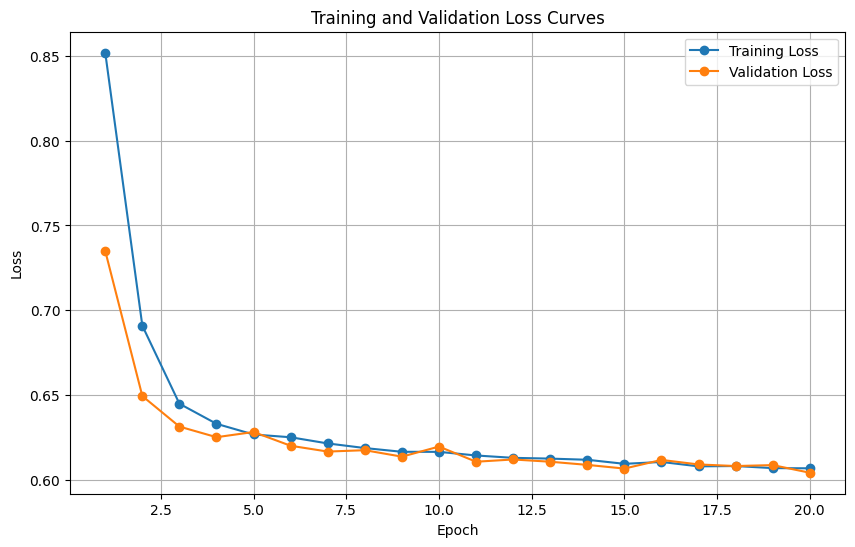


Loss curve with balanced model:


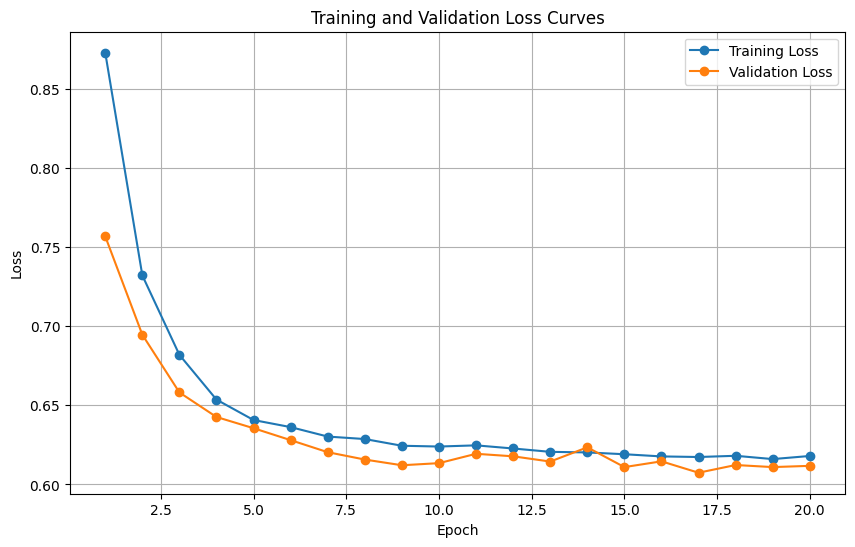

In [50]:
print("Loss curve with unbalanced model:")
plot_loss(unbalanced_model['train_loss_history'], unbalanced_model['val_loss_history'])

print("\nLoss curve with balanced model:")
plot_loss(balanced_model['train_loss_history'], balanced_model['val_loss_history'])

### Confusion Matrix

If we plot the confusion matrices for both the balanced and unbalanced models we can see that although very similar, the balanced model is slightly better at predicting QSOs.

Confusion matrix with unbalanced model:


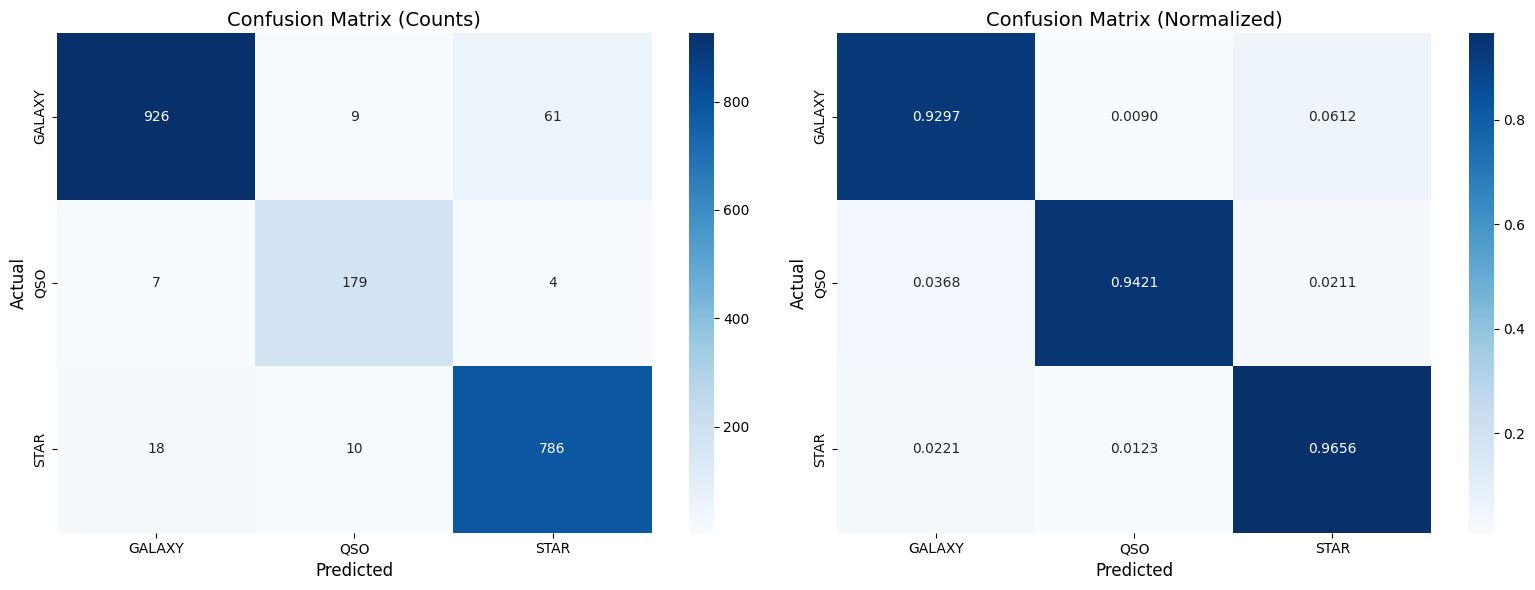


Confusion matrix with balanced model:


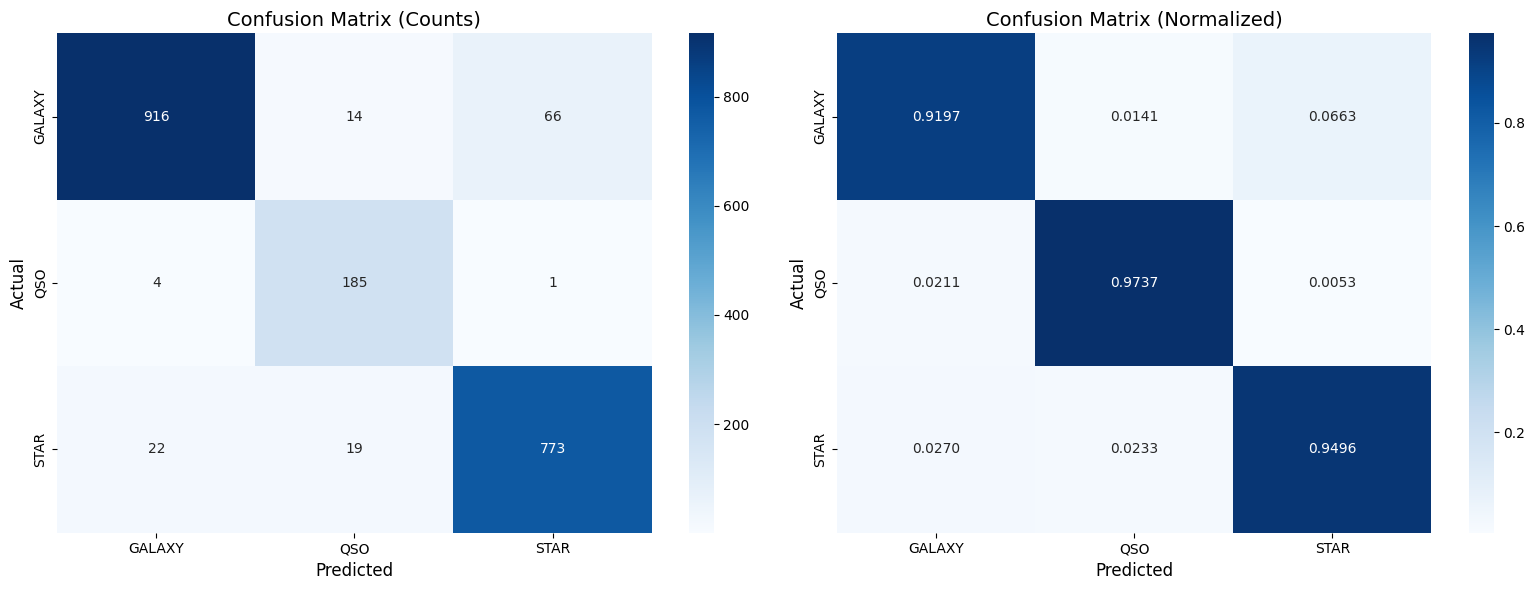

In [52]:
print("Confusion matrix with unbalanced model:")
plot_cm(unbalanced_model['confusion_matrix'], unbalanced_model['confusion_matrix_normalized'], np.unique(labels))

print("\nConfusion matrix with balanced model:")
plot_cm(balanced_model['confusion_matrix'], balanced_model['confusion_matrix_normalized'], np.unique(labels))

### Why are both Balanced and Unbalanced so Similar?

So by comparing the model as run in Question 2, with the same model but balancing the classes affect on the loss, we see that there isn't much change overall. There are several things that could cause this:
- The classes in the dataset are well balanced
    - This is true for stars and galaxies, but as we saw earlier there are significantly less QSO than the other two
- The model might have sufficient capacity to model the data, and therefore it doesn't matter than the classes aren't balanced
- Other hyperparameters such as epoch, batch size, or learning rate may be more dominant in the models performance
    - If this is the case, the class imbalance is effectively masked and won't be obvious from the results
- If the model is over or under fitting it could explain why balancing the classes doesn't affect the results much
    - This is less likely as the confusion matrices don't show any severe over or under fitting

## Conclusion

Overall, for this particular dataset and FNN, editing the amount of training data or the balance between classes didn't have a huge impact on the model's performance. It still performed with an average of at least 90% accuracy regardless of what was changed.

This isn't necessarily going to be the case all the time though. Here are some ways that both of these can affect a model in general:
- Amount of Training Data
    - Impact on Generalization:
        - A larger amount of diverse training data helps a neural network generalize better to unseen data, therefore increasing its accuracy
        - More data reduces the risk of overfitting because the model can learn patterns that are more representative of the overall population rather than memorizing specific examples
        - Conversely, insufficient training data often leads to poor generalization, with the model performing well on training data but failing on unseen data (overfitting)
    - Learning Complex Patterns:
        - Most NNs, require significant data to learn complex patterns
        - With too little data, the network might not have enough information to accurately approximate the true underlying relationships in the data
    - Risk of Underfitting:
        - If the amount of data is very small relative to the model's complexity, the network may not capture the patterns at all, resulting in underfitting
    - Dimensionality and Data Size:
        - For high-dimensional data (e.g., images or text), larger datasets are typically needed because the model must learn meaningful features across many dimensions

- Balance of Classes in a Classification Problem
    - Bias in Predictions:
        - Imbalanced datasets, where some classes are underrepresented, can lead to biased predictions
        - The neural network may become biased towards the majority class, as minimizing the overall loss might prioritize correct predictions for the majority class over the minority class
    - Reduced Sensitivity to Minority Classes:
        - An imbalanced dataset often results in poor performance for minority classes, with metrics like precision, recall, and F1 score showing significant degradation for these classes
    - Loss Function Impact:
        - Imbalanced classes affect how the loss function is optimized
        - Standard loss functions (like cross-entropy) tend to favor the majority class unless specifically adjusted, such as by using class weights
    - Mitigation Techniques:
        - Techniques such as oversampling the minority class (e.g., SMOTE), undersampling the majority class, or using data augmentation can help address class imbalance
        - Alternatively, ensemble methods or techniques like cost-sensitive learning can also improve performance on imbalanced datasets